# Objective is to classify whether or not a user will purchase the product or not if ad is shown to him based on user's age and salary

In [190]:
import pandas as pd   # for reading the csv file
import numpy as np     # for dea;ing with n-dimensional matrices
import matplotlib.pyplot as plt       # for plotting the results
from IPython.display import clear_output  
from scipy.stats import multivariate_normal

In [191]:
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")   

dataset=dataset.drop(['User ID','Gender'],axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [192]:
dataset.isna().sum()   #checking the presence of NaN values in the dataset

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Plotting the datapoints

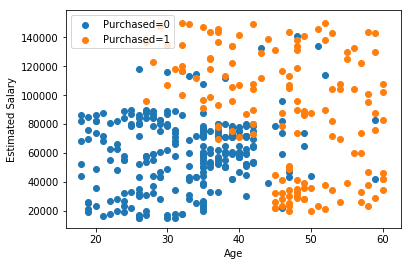

In [193]:
plt.scatter(dataset[dataset['Purchased']==0]['Age'],dataset[dataset['Purchased']==0]['EstimatedSalary'],label="Purchased=0")
plt.scatter(dataset[dataset['Purchased']==1]['Age'],dataset[dataset['Purchased']==1]['EstimatedSalary'],label="Purchased=1")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

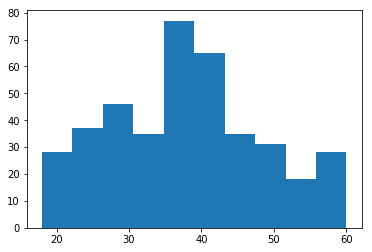

In [194]:
plt.hist(dataset['Age'])

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

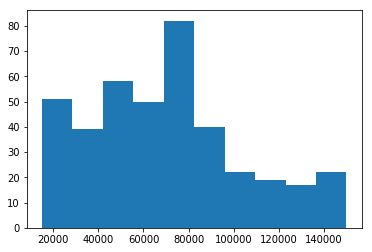

In [195]:
plt.hist(dataset['EstimatedSalary'])

# selecting Y, 

In [33]:
Y=(np.array(dataset['Purchased'])).reshape(len(dataset),1)

# Naive Bayes Classification Algorithm

### $$  P( class=1 | feature=x) = \frac{P( feature=x | class=1 )  * P( class=1)} {[(P( feature=x | class=1 )  * P( class=1))+(P( feature=x | class=1 )  * P( class=1))]}  $$

##  where
###          P( class=1 | feature=x) is our Posterior Probabilty of User Purchasing the product provided feature=x 
###                       if P( class=1 | feature=x)> P( class=0 | feature=x), class_predicted=1 elseclass_predicted=0
###          P( feature=x | class=1 ) is our likelihood probability which will be calculed from the data distribution itself. If we random pick up an user from the set of user for whom Purchase=1, then  P( age=x | class=1 )  is the probabilty that the feature value = x.
###          P(class=1) is the Prior Probablity and it can be calculated as 
## $$   P(class=1)=  \frac{numberOfRowsWith(Purchase==1)}{TotalNumberOfRows} $$  

## calculating prior probabilities:

In [196]:
prior_class0=len(dataset[dataset['Purchased']==0])/len(dataset)
prior_class1=len(dataset[dataset['Purchased']==1])/len(dataset)

In [213]:
X=dataset.drop('Purchased',axis=1)

# normalisation

In [214]:
X = (X -np.mean(X,axis=0))/np.std(X,axis=0)

# Splitting of data

In [215]:
X_class0= (X[dataset['Purchased']==0])
X_class1= X[dataset['Purchased']==1]


# calculating mean and covariance matrix for both X_class0 and X_class1 data

In [216]:
# calculating covariance matrices
cov_classs0 = X_class0.cov()
cov_classs1 = X_class1.cov()


In [217]:
X_class0=np.array(X_class0)
X_class1=np.array(X_class1)

mean_class0=(np.array(X_class0.mean(axis=0))).reshape(len(X_class0.T),1)
mean_class1=(np.array(X_class1.mean(axis=0))).reshape(len(X_class1.T),1)

X=np.array(X)

## calculating likelihood probabilities , P( age=x1 and salary=x2 | class=1or0 )
### Since our Age feature is following some distribution closer to Gaussian Distribution
## $$  P(age=x | class=1) = \frac{e^ (\frac{-(X-mean )^T *inverseOfCov * (X-mean )}{2} )}{ (2\pi *determinantOfCov)^k } $$
###  where  k = number of features
###                     mean is the vector of mean taken of each column, i.e., len(mean)=k
###                     cov is the covariance matrix of shape kXk
###                     X is a row vector corresponding to one user

In [223]:
def multivariate_norm_pdf(x,mean,cov):
    
    return (1/(((2*np.pi)**len(x.T) * np.linalg.det(cov))**0.5))* np.exp(-0.5* np.dot(np.dot((x-mean).T,np.linalg.inv(cov)) , (x-mean))[0][0] )

## calculating Posterior Probablities

In [224]:
def posterior_normal(example,mean_class0,cov0,mean_class1,cov1):   
    numerator0= multivariate_norm_pdf(example,mean_class0,cov0)*prior_class0
    numerator1= multivariate_norm_pdf(example,mean_class1,cov1)*prior_class1
    return numerator0/(numerator0+numerator1)  ,  numerator1/(numerator0+numerator1)



## testing :  
### if for an example age, posterior1>posterior0: then model will predict Purchase=1 else Purchase=0

In [238]:
def predict_using_normal(xtest):
    y_predicted=[]
    for i in range(0,len(xtest)):
        
        posterior0,posterior1=posterior_normal(xtest[i],mean_class0,cov_classs0,mean_class1,cov_classs0)
        if posterior0>posterior1:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
    y_predicted=(np.array(y_predicted)).reshape(len(y_predicted),1)
    return y_predicted.reshape(len(y_predicted),1)



def accuracy(y_predicted,y_actual):
    #y_actual=y_actual.reshape(len(y_actual),1)
    return 100*(len(Y[y_predicted==y_actual])/len(y_predicted))
    

## On using Age and Salary as feature and assuming them to be Norally Distributed

In [240]:
print("Accuracy is",accuracy(predict_using_normal(X),Y),"%",)

Accuracy is 83.0 %


In [241]:
prediction=predict_using_normal(X)

# Visualising the Results

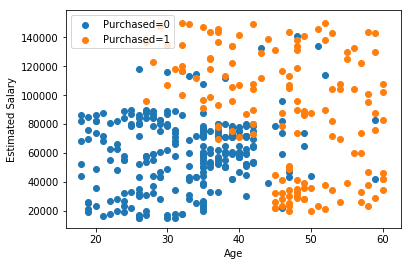

In [255]:
plt.scatter(dataset[dataset['Purchased']==0]['Age'],dataset[dataset['Purchased']==0]['EstimatedSalary'],label="Purchased=0")
plt.scatter(dataset[dataset['Purchased']==1]['Age'],dataset[dataset['Purchased']==1]['EstimatedSalary'],label="Purchased=1")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

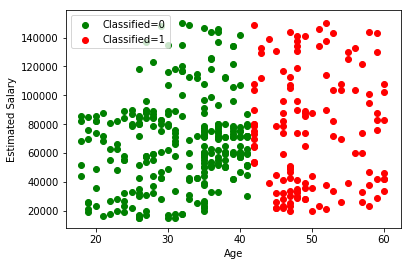

In [254]:
plt.scatter(dataset[prediction==0]['Age'],dataset[prediction==0]['EstimatedSalary'],label="Classified=0",color="green")
plt.scatter(dataset[prediction==1]['Age'],dataset[prediction==1]['EstimatedSalary'],label="Classified=1",color='red')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()

In [257]:
for i in range(len(prediction)):
    print("actual :",Y[i]," Classified as : ",prediction[i])

actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [0]  Classi

actual : [0]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [0]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [0]
actual : [0]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [0]  Classified as :  [0]
actual : [1]  Classified as :  [1]
actual : [0]  Classi